In [69]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns

In [2]:
df = pd.read_csv("cars_24.csv")

In [3]:
df.head()

,Name,Year,Kms_Driven,Owner,Fuel,Location,Drive,Type,Price
0,Maruti S PRESSO,2022.0,3878,1,PETROL,HR-98,Manual,HatchBack,514000
1,Hyundai Xcent,2018.0,32041,1,PETROL,TN-22,Manual,Sedan,674000
2,Tata Safari,2021.0,96339,1,DIESEL,TS-08,Automatic,SUV,1952000
3,Maruti Vitara Brezza,2019.0,51718,1,DIESEL,WB-24,Manual,SUV,690000
4,Tata Tiago,2021.0,19811,1,PETROL,HR-51,Manual,HatchBack,526000


In [4]:
# Extract 'Brand' from 'Name' Column
df["Brand"] = df["Name"].astype(str).str.split().str[0]

# Extract 'Model' from 'Name' Column
df["Model"] = df["Name"].astype(str).str.split().str[1:].str.join(" ")

In [5]:
df = df[["Name", "Brand", "Model", "Year", "Kms_Driven", "Owner", "Fuel", "Drive", "Type", "Price"]].copy()

##**Data Cleaning**

In [6]:
# Create a backup of df
backup = df.copy()

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8015 entries, 0 to 8014
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Name        8014 non-null   object 
 1   Brand       8015 non-null   object 
 2   Model       8015 non-null   object 
 3   Year        8014 non-null   float64
 4   Kms_Driven  8015 non-null   int64  
 5   Owner       8015 non-null   int64  
 6   Fuel        8015 non-null   object 
 7   Drive       8015 non-null   object 
 8   Type        8015 non-null   object 
 9   Price       8015 non-null   int64  
dtypes: float64(1), int64(3), object(6)
memory usage: 626.3+ KB


In [8]:
# Any Missing Values?
df.isnull().sum()

,0
Name,1
Brand,0
Model,0
Year,1
Kms_Driven,0
Owner,0
Fuel,0
Drive,0
Type,0
Price,0


In [9]:
# Drop the Missing Values
df.dropna(inplace = True)

In [10]:
# Check again
df.isnull().sum()

,0
Name,0
Brand,0
Model,0
Year,0
Kms_Driven,0
Owner,0
Fuel,0
Drive,0
Type,0
Price,0


In [11]:
# Any Duplicates?
df.duplicated().sum()

np.int64(0)

In [12]:
# Standardize formatting for 'Brand' Column
df["Brand"] = df["Brand"].str.strip().str.upper()

In [13]:
# Cleaning 'Model' Column a bit:
df["Model"] = (
    df["Model"]
    .str.replace("-", " ", regex = False)
    .str.upper()
    .str.strip()
)

# Merging the models that are same(truly)
df["Model"] = df["Model"].replace({
    "SWIFT DZIRE": "DZIRE"
})

In [14]:
# Standardize formatting for 'Drive' and 'Type' Columns
df["Drive"] = df["Drive"].str.strip().str.upper()
df["Type"] = df["Type"].str.strip().str.upper()

In [15]:
# Change the dtypes of 'Year' and 'Owner Columns

df["Year"] = df["Year"].astype(int)
df["Owner"] = df["Owner"].astype('category')

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8014 entries, 0 to 8014
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   Name        8014 non-null   object  
 1   Brand       8014 non-null   object  
 2   Model       8014 non-null   object  
 3   Year        8014 non-null   int64   
 4   Kms_Driven  8014 non-null   int64   
 5   Owner       8014 non-null   category
 6   Fuel        8014 non-null   object  
 7   Drive       8014 non-null   object  
 8   Type        8014 non-null   object  
 9   Price       8014 non-null   int64   
dtypes: category(1), int64(3), object(6)
memory usage: 634.1+ KB


In [17]:
df.shape

(8014, 10)

In [ ]:
df.to_csv("cleaned_cars_24.csv", index = False)

##**Exploratory Data Analysis(EDA)**

In [ ]:
df.describe()

,Year,Kms_Driven,Price
count,8014.000000,8014.000000,8.014000e+03
mean,2016.995009,52626.256676,5.748328e+05
std,2.861454,29181.519800,2.650835e+05
min,2010.000000,0.000000,1.190000e+05
25%,2015.000000,30736.750000,3.930000e+05
50%,2017.000000,50369.500000,5.350000e+05
75%,2019.000000,71762.500000,6.980000e+05
max,2023.000000,971212.000000,3.300000e+06


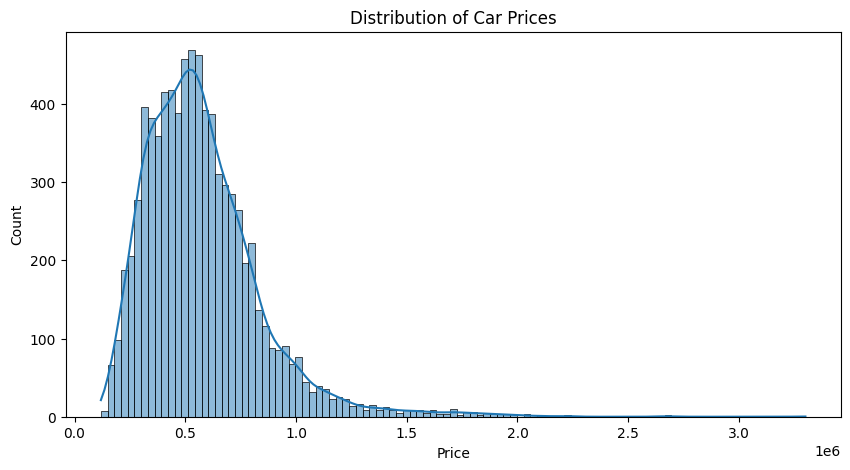

In [ ]:
# Distribution of Car Prices
fig,ax = plt.subplots(figsize = (10, 5))
sns.histplot(df["Price"], kde = True)
plt.title("Distribution of Car Prices")
plt.show()

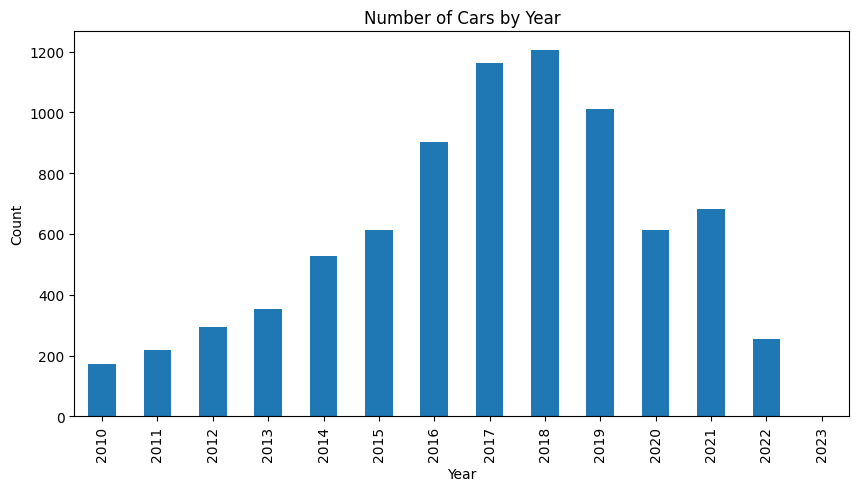

In [ ]:
# Number of Cars by Year
df["Year"].value_counts().sort_index().plot(kind = "bar", figsize = (10, 5))
plt.title("Number of Cars by Year")
plt.xlabel("Year")
plt.ylabel("Count")
plt.show()

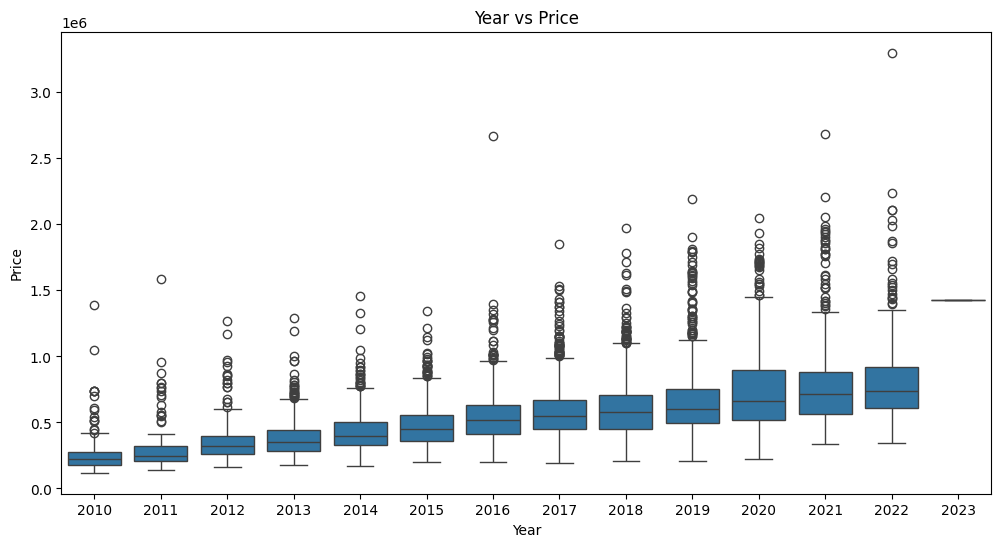

In [ ]:
# Year vs Price
fig,ax = plt.subplots(figsize = (12, 6))
sns.boxplot(x = "Year", y = "Price", data = df, ax = ax)
plt.title("Year vs Price")
plt.show()

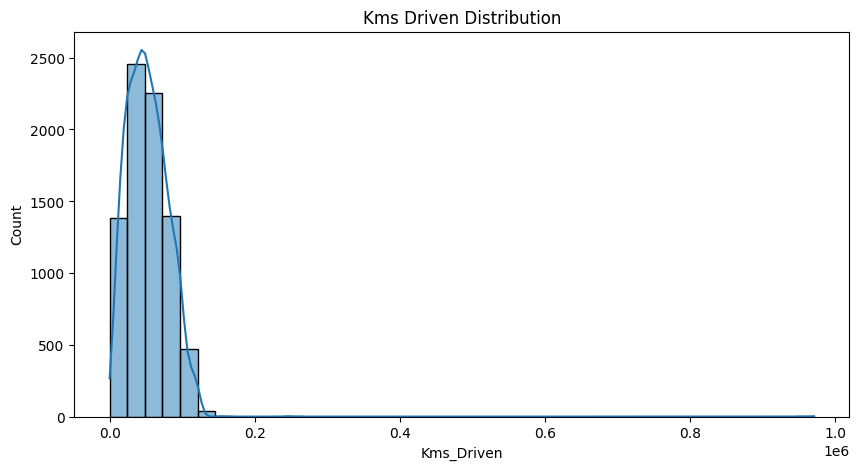

In [ ]:
# Kms Driven Distribution
fig,ax = plt.subplots(figsize = (10, 5))
sns.histplot(df["Kms_Driven"], bins = 40, kde = True)
plt.title("Kms Driven Distribution")
plt.show()

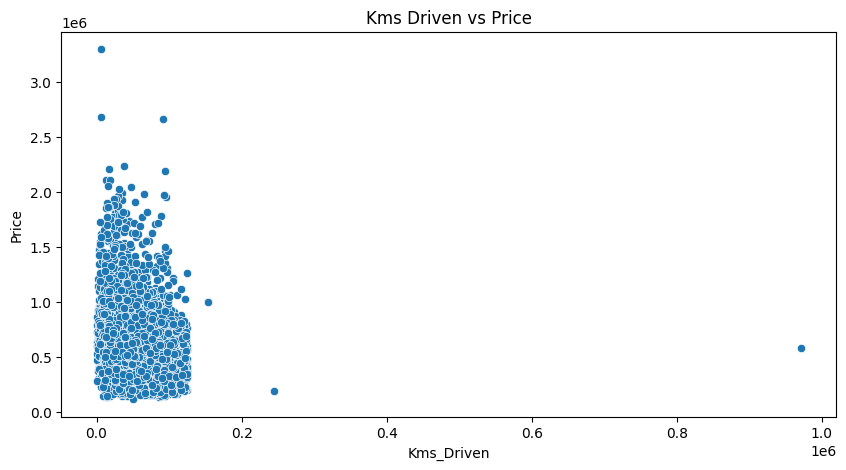

In [ ]:
# Kms_Driven vs Price
fig,ax = plt.subplots(figsize = (10, 5))
sns.scatterplot(x = "Kms_Driven", y = "Price", data = df, ax = ax)
plt.title("Kms Driven vs Price")
plt.show()

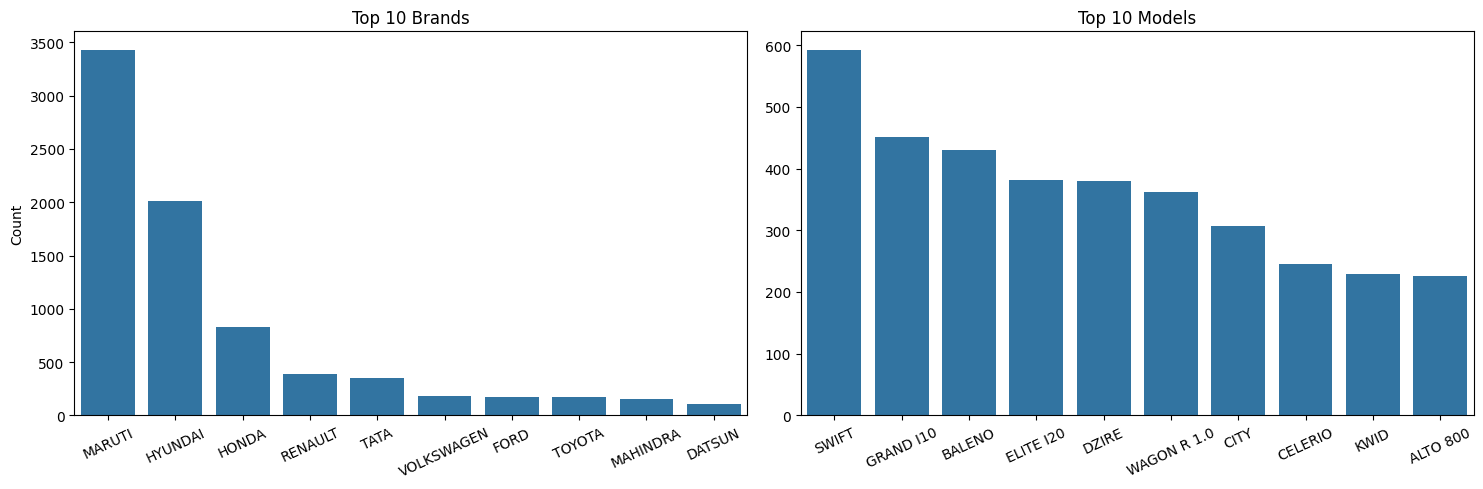

In [ ]:
# Top 10 Brands and Models
top_brands = df["Brand"].value_counts().head(10)
top_models = df["Model"].value_counts().head(10)

# Create subplots
fig, (ax0, ax1) = plt.subplots(1, 2, figsize = (15, 5))

# Plot Top 10 Brands
sns.barplot(x = top_brands.index, y = top_brands.values, ax = ax0)
ax0.set_title("Top 10 Brands")
ax0.set_xlabel("")
ax0.set_ylabel("Count")
ax0.tick_params(axis = "x", rotation = 25)

# Plot Top 10 Models
sns.barplot(x = top_models.index, y = top_models.values, ax = ax1)
ax1.set_title("Top 10 Models")
ax1.set_xlabel("")
ax1.set_ylabel("")
ax1.tick_params(axis = "x", rotation = 25)

plt.tight_layout()
plt.show()

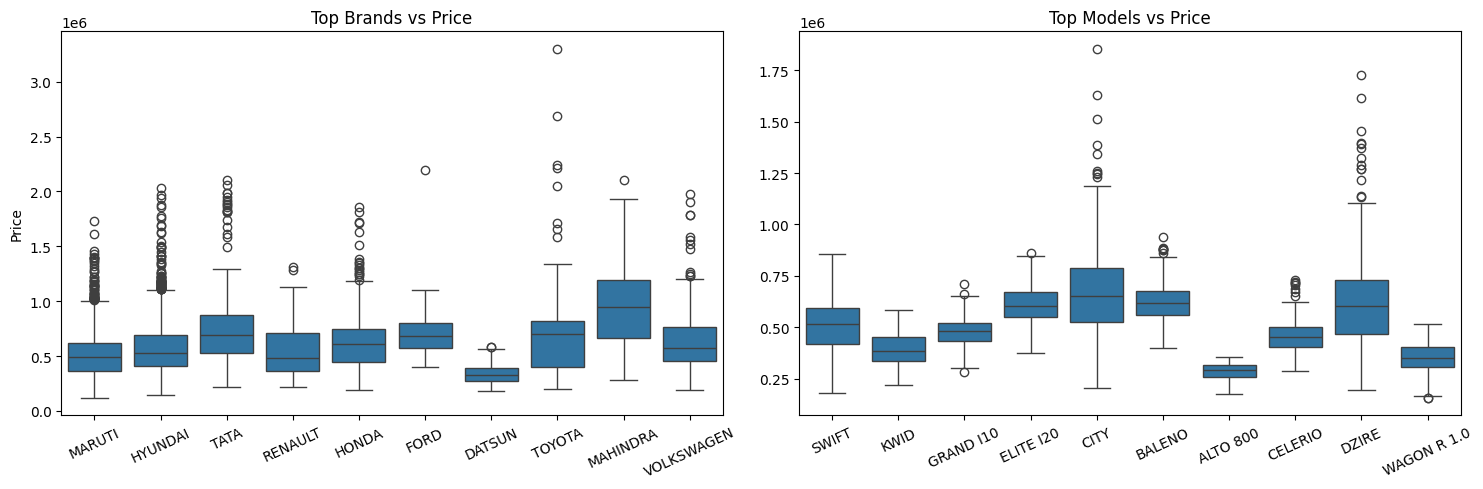

In [ ]:
# Top Brands and Models vs Price

# Create subplots
fig, (ax0, ax1) = plt.subplots(1, 2, figsize = (15, 5))

# Top Brands vs Price
sns.boxplot(x = "Brand", y = "Price", data = df[df["Brand"].isin(top_brands.index)], ax = ax0)
ax0.set_title("Top Brands vs Price")
ax0.set_xlabel("")
ax0.set_ylabel("Price")
ax0.tick_params(axis = "x", rotation = 25)

# Top Models vs Price
sns.boxplot(x = "Model", y = "Price", data = df[df["Model"].isin(top_models.index)], ax = ax1)
ax1.set_title("Top Models vs Price")
ax1.set_xlabel("")
ax1.set_ylabel("")
ax1.tick_params(axis = "x", rotation = 25)

plt.tight_layout()
plt.show()

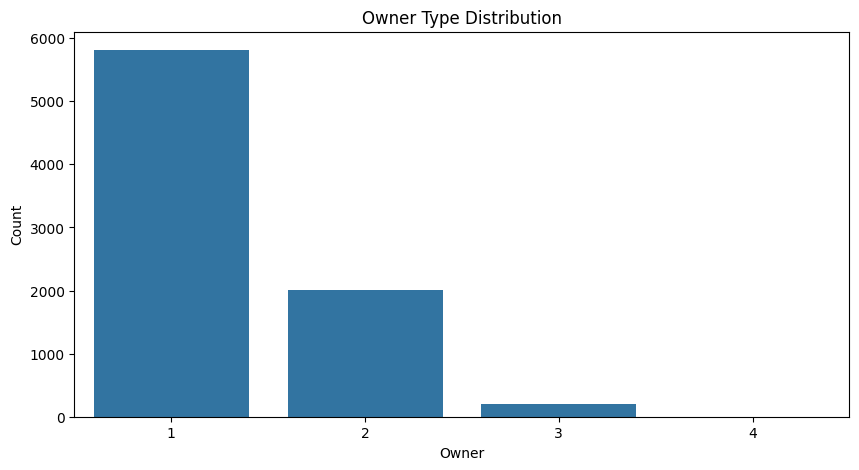

In [ ]:
# Owner Type Distribution
fig,ax = plt.subplots(figsize = (10, 5))
sns.countplot(x = "Owner", data = df, ax = ax)
plt.title("Owner Type Distribution")
plt.ylabel("Count")
plt.show()

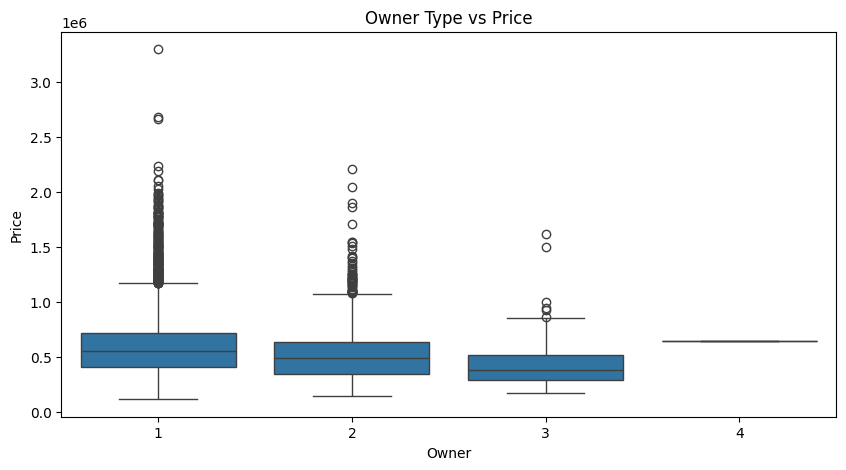

In [ ]:
# Owner Type vs Price
fig,ax = plt.subplots(figsize = (10, 5))
sns.boxplot(x = "Owner", y = "Price", data = df, ax = ax)
plt.title("Owner Type vs Price")
plt.show()

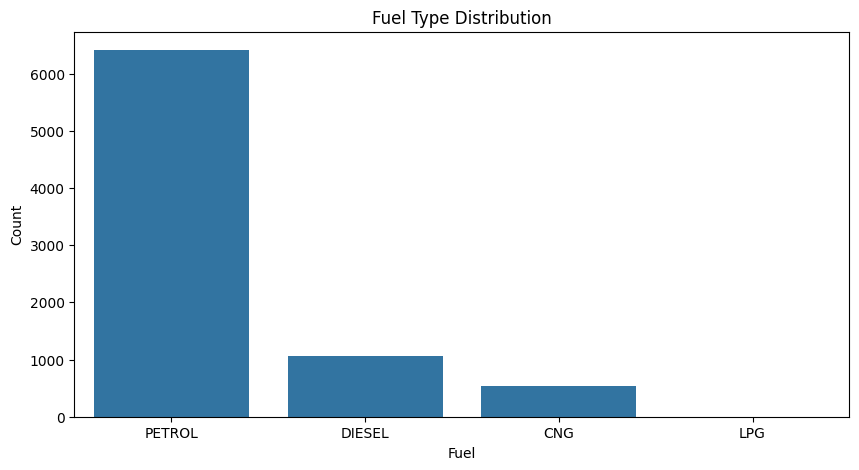

In [ ]:
# Fuel Type Distribution
fig,ax = plt.subplots(figsize = (10, 5))
sns.countplot(x = "Fuel", data = df, ax = ax)
plt.title("Fuel Type Distribution")
plt.ylabel("Count")
plt.show()

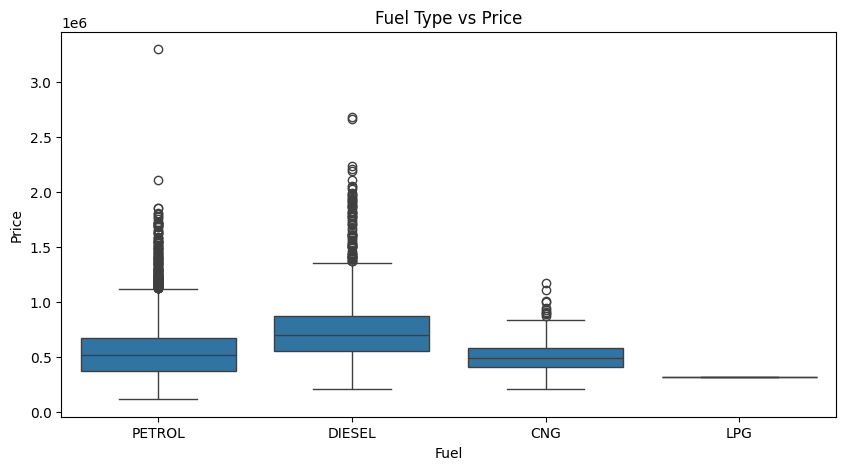

In [ ]:
# Fuel Type vs Price
fig,ax = plt.subplots(figsize = (10, 5))
sns.boxplot(x = "Fuel", y = "Price", data = df, ax = ax)
plt.title("Fuel Type vs Price")
plt.show()

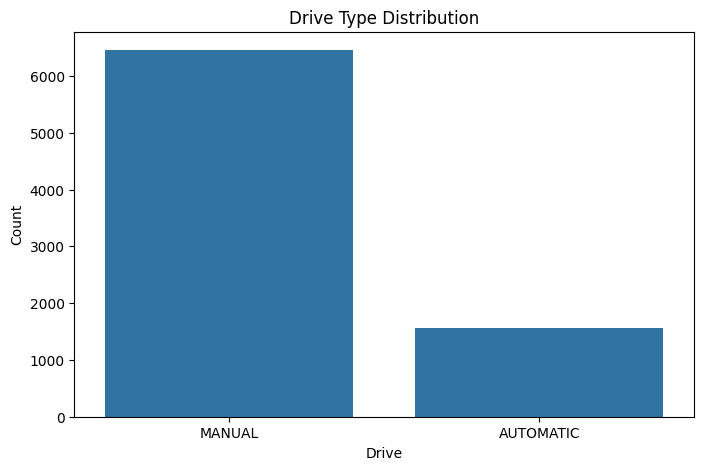

In [ ]:
# Drive Type Distribution
fig,ax = plt.subplots(figsize = (8, 5))
sns.countplot(x = "Drive", data = df, ax = ax)
plt.title("Drive Type Distribution")
plt.ylabel("Count")
plt.show()

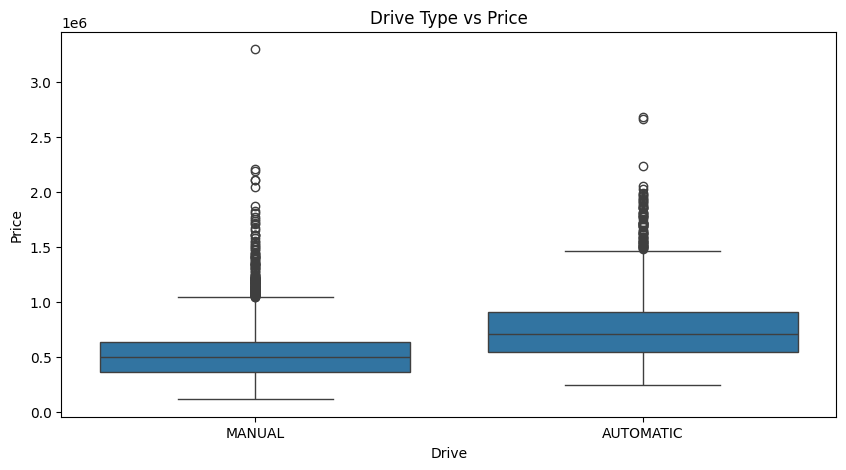

In [ ]:
# Drive Type vs Price
fig,ax = plt.subplots(figsize = (10, 5))
sns.boxplot(x = "Drive", y = "Price", data = df, ax = ax)
plt.title("Drive Type vs Price")
plt.show()

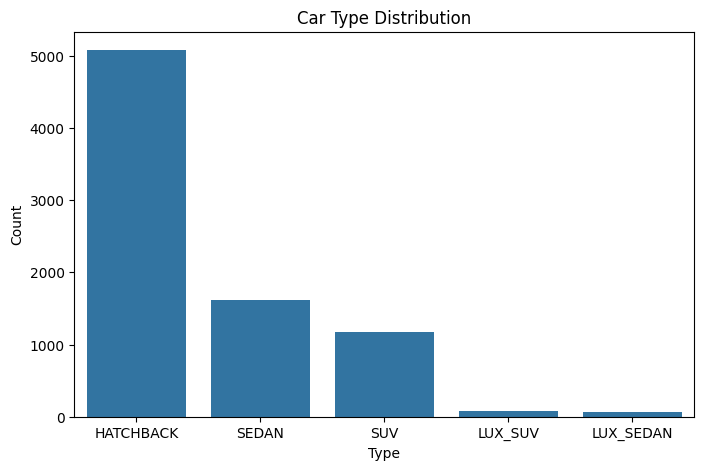

In [ ]:
# Car Type Distribution
fig,ax = plt.subplots(figsize = (8, 5))
sns.countplot(x = "Type", data = df, ax = ax)
plt.title("Car Type Distribution")
plt.ylabel("Count")
plt.show()

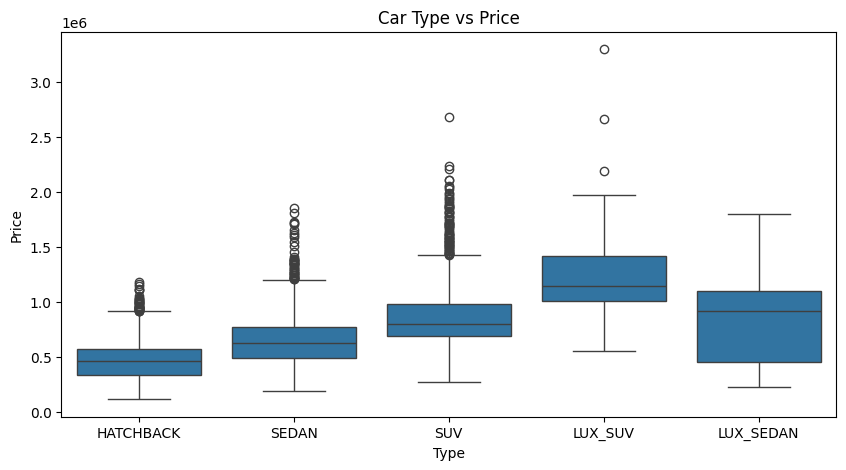

In [ ]:
# Car Type vs Price
fig,ax = plt.subplots(figsize = (10, 5))
sns.boxplot(x = "Type", y = "Price", data = df, ax = ax)
plt.title("Car Type vs Price")
plt.show()

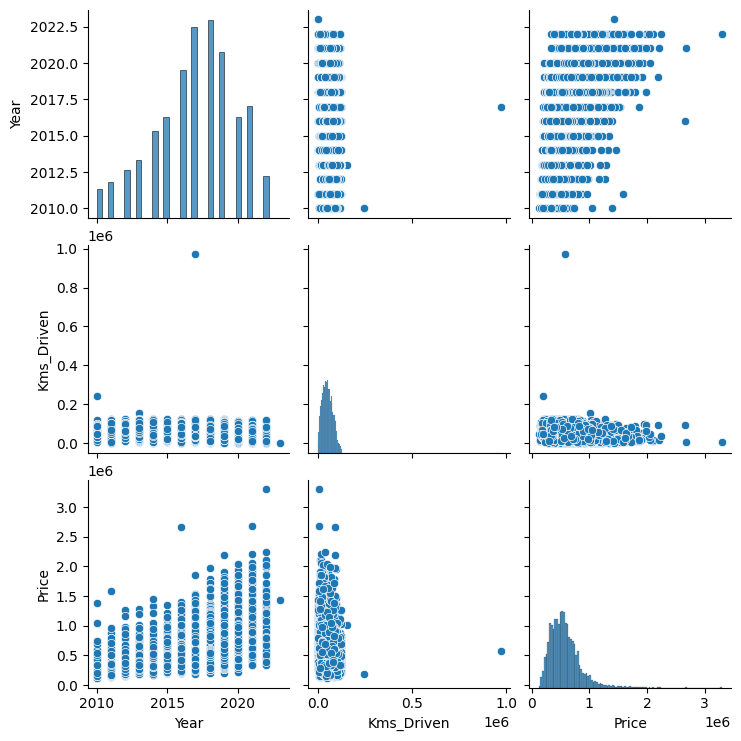

In [ ]:
# Visualizing pairwise relationships between Numeric Features
sns.pairplot(df)
plt.show()

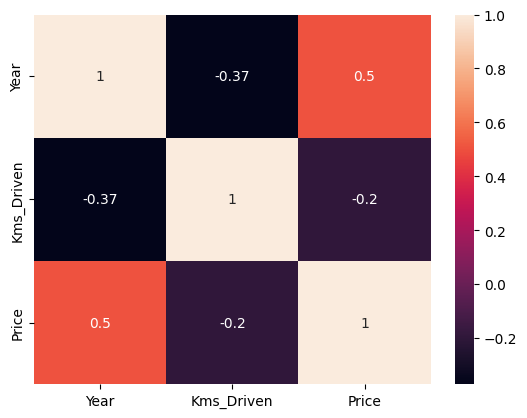

In [ ]:
sns.heatmap(df.corr(numeric_only = True),  annot = True)
plt.show()

In [18]:
# Encode Rare Categories in 'Model' Column to 'Other'
model_counts = df["Model"].value_counts()
rare_models = model_counts[model_counts < 20].index
df["Model"] = df["Model"].apply(lambda x: "OTHER" if x in rare_models else x)

In [19]:
# Data Type Adjustments
df["Brand"] = df["Brand"].astype("category")
df["Model"] = df["Model"].astype("category")
df["Fuel"] = df["Fuel"].astype("category")
df["Drive"] = df["Drive"].astype("category")
df["Type"] = df["Type"].astype("category")

##**Feature Engineering**

In [20]:
from datetime import datetime

# Creating the Car_Age Column from Year
current_year = datetime.now().year
df["Car_Age"] = current_year - df["Year"]

# Normalize the Kms_Driven Column by Year
df["Kms_per_Year"] = df["Kms_Driven"] / df["Car_Age"].replace(0, 1)

# Binarize the Owner Column
df["Is_First_Owner"] = (df["Owner"] == 1).astype(int)

# Frequency Encode the Model Column
model_freq = df["Model"].value_counts().to_dict()
df["Model_Freq"] = df["Model"].map(model_freq)

##**Data Splitting**

In [21]:
X = df[["Brand", "Model", "Model_Freq", "Car_Age", "Kms_per_Year", "Owner", "Is_First_Owner", "Fuel", "Drive", "Type"]]
y = df["Price"]     # For tree-based models
y_log = np.log1p(df["Price"])  # For linear models

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test, y_log_train, y_log_test = train_test_split(X, y, y_log, test_size = 0.2, random_state = 39)

In [23]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape, y_log_train.shape, y_log_test.shape)

(6411, 10) (1603, 10) (6411,) (1603,) (6411,) (1603,)


In [24]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, FunctionTransformer

##**Data Preprocessing**

In [25]:
# Preprocessing Pipelines

# Columns by type
log_cols = ["Kms_per_Year"]
scale_only_cols = ["Model_Freq", "Car_Age"]
cat_cols = ["Brand", "Model", "Owner", "Fuel", "Drive", "Type"]

# Log + Scaling Pipeline
log_pipeline = Pipeline([
    ("log", FunctionTransformer(np.log1p, feature_names_out = "one-to-one")),
    ("scale", StandardScaler())
])

# Scaling only Pipeline
scale_pipeline = Pipeline([
    ("scale", StandardScaler())
])

# Full Preprocessing Pipeline
full_preprocessing_ln = ColumnTransformer([
    ("log_num", log_pipeline, log_cols),
    ("scale_num", scale_pipeline, scale_only_cols),
    ("cat", OneHotEncoder(handle_unknown = "ignore"), cat_cols)
], remainder = "passthrough")

# Full Preprocessing Pipeline (For Tree Based Models)
full_preprocessing_tr = ColumnTransformer([
    ("cat", OneHotEncoder(handle_unknown = "ignore"), cat_cols)
], remainder = "passthrough")

##**Model Building**

In [26]:
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

In [27]:
linear_models = {
    "Linear Regression": Pipeline([
        ("preprocessing", full_preprocessing_ln),
        ("regressor", LinearRegression())
    ]),

    "Ridge Regression": Pipeline([
        ("preprocessing", full_preprocessing_ln),
        ("regressor", Ridge(alpha = 10))
    ]),

    "KNN": Pipeline([
        ("preprocessing", full_preprocessing_ln),
        ("regressor", KNeighborsRegressor(n_neighbors = 5))
    ])
}

tree_models = {
    "Random Forest": Pipeline([
        ("preprocessing", full_preprocessing_tr),
        ("regressor", RandomForestRegressor(n_estimators = 100, random_state = 42))
    ]),

    "XGBoost": Pipeline([
        ("preprocessing", full_preprocessing_tr),
        ("regressor", XGBRegressor(n_estimators = 100, learning_rate = 0.1, random_state = 42))
    ])
}

In [28]:
from sklearn.metrics import root_mean_squared_error, r2_score

In [115]:
results = []

all_models = {**linear_models, **tree_models}

for name, model in all_models.items():
    if name in linear_models:
        model.fit(X_train, y_log_train)
        y_pred = model.predict(X_test)
        y_true = np.expm1(y_log_test)
        y_pred = np.expm1(y_pred)
    else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        y_true = y_test

    # Evaluation
    rmse = root_mean_squared_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)

    # Store results
    results.append({
        "Model": name,
        "RMSE": round(rmse, 2),
        "R2 Score": round(r2, 4)
    })

    results_df = pd.DataFrame(results)

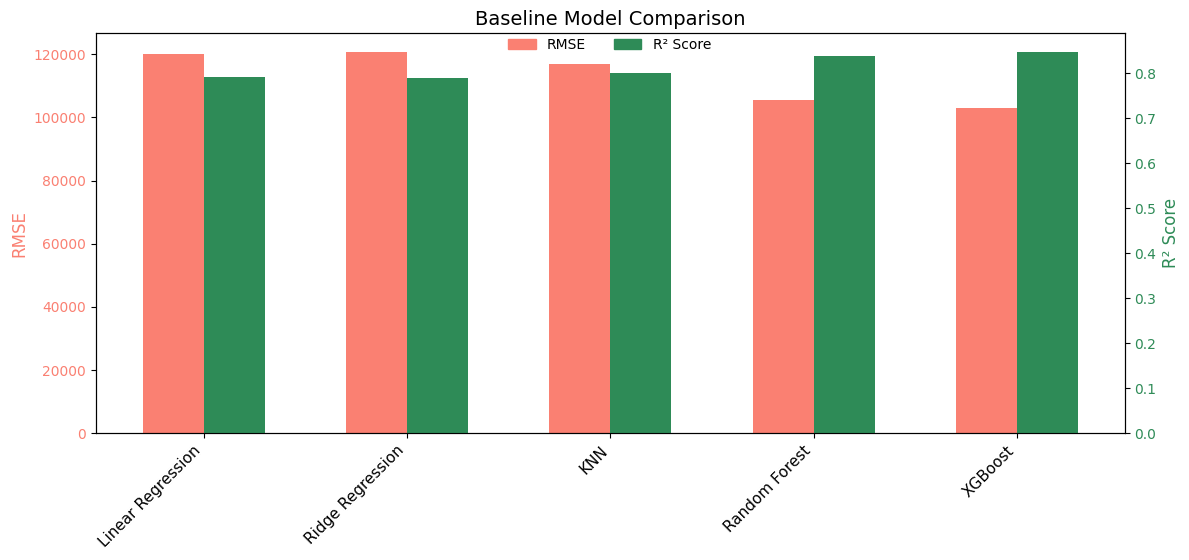

In [112]:
fig,ax1 = plt.subplots(figsize = (12, 6))
ax2 = ax1.twinx()

x = np.arange(len(results_df["Model"]))
width = 0.3    # width of each bar

# Plot RMSE bars (Left Y-axis)
rmse_bars = ax1.bar(x - width/2, results_df["RMSE"], width, color = "salmon")
ax1.set_ylabel("RMSE", color = "salmon", fontsize = 12)
ax1.tick_params(axis = "y", labelcolor = "salmon")

# Plot R² Score bars (Right Y-axis)
r2_bars = ax2.bar(x + width/2, results_df["R2 Score"], width, color = "seagreen")
ax2.set_ylabel("R² Score", color = "seagreen", fontsize = 12)
ax2.tick_params(axis = "y", labelcolor = "seagreen")

# X-axis configuration
ax1.set_xticks(x, labels = results_df["Model"], rotation = 45, ha = "right", fontsize = 11)

# Title
plt.title("Baseline Model Comparison", fontsize = 14)

# Custom Legend
rmse_patch = mpatches.Patch(color = "salmon", label = "RMSE")
r2_patch = mpatches.Patch(color = "seagreen", label = "R² Score")
plt.legend(handles = [rmse_patch, r2_patch], loc = "upper right", bbox_to_anchor = (0.61, 1.02), ncol = 2, frameon = False)

fig.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

##**Model Optimization**

In [ ]:
# Finding the best random_state for splitting
random_states = range(1, 51)
results = {name: [] for name in all_models.keys()}
best_states = {}

for state in random_states:
  X_train, X_test, y_train, y_test, y_log_train, y_log_test = train_test_split(
      X, y, y_log, test_size = 0.2, random_state = state)

  for name, model in all_models.items():
    if name in linear_models:
      model.fit(X_train, y_log_train)
      y_pred_log = model.predict(X_test)
      y_pred = np.expm1(y_pred_log)
    else:
      model.fit(X_train, y_train)
      y_pred = model.predict(X_test)

    r2 = r2_score(y_test, y_pred)
    results[name].append((state, r2))

# Display best random state for each model
print("Best random_state per model (based on R² score):\n")
for name, scores in results.items():
    best_state, best_r2 = max(scores, key = lambda x: x[1])
    print(f"{name}: Best R² = {best_r2:.4f} at random_state = {best_state}")

Best random_state per model (based on R² score):

Linear Regression: Best R² = 0.8023 at random_state = 14
Ridge Regression: Best R² = 0.7934 at random_state = 14
KNN: Best R² = 0.8016 at random_state = 39
Random Forest: Best R² = 0.8390 at random_state = 39
XGBoost: Best R² = 0.8465 at random_state = 39


In [ ]:
from sklearn.model_selection import cross_val_score, KFold

In [ ]:
# 5-Fold Cross Validation
cv = KFold(n_splits = 5, shuffle = True, random_state = 39)

print("Cross-Validation R² Scores:\n")
for name, model in all_models.items():
    target = y_log if name in linear_models else y  # use y_log for linear models
    scores = cross_val_score(model, X, target, cv = cv, scoring = 'r2', n_jobs = -1)
    print(f"{name}:\n Mean R² Score = {scores.mean():.4f}, Std = {scores.std():.4f}\n")

Cross-Validation R² Scores:

Linear Regression:
 Mean R² Score = 0.8161, Std = 0.0140

Ridge Regression:
 Mean R² Score = 0.8125, Std = 0.0154

KNN:
 Mean R² Score = 0.8077, Std = 0.0145

Random Forest:
 Mean R² Score = 0.8030, Std = 0.0258

XGBoost:
 Mean R² Score = 0.8159, Std = 0.0229



In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
param_grid = {
    "Linear Regression": {},  # No hyperparameters to tune
    "Ridge Regression": {
        "regressor__alpha": [0.01, 0.1, 1.0, 10.0, 100.0],
        "regressor__solver": ["auto", "lsqr"]
    },
    "KNN": {
        "regressor__n_neighbors": [3, 5, 7, 9, 11],
        "regressor__weights": ["uniform", "distance"],
        "regressor__p": [1, 2]
    },
    "Random Forest": {
        "regressor__n_estimators": [100, 200],
        "regressor__max_depth": [None, 10, 20],
        "regressor__min_samples_split": [2, 5],
        "regressor__max_features": ["sqrt", "log2"]
    },
    "XGBoost": {
        "regressor__n_estimators": [100, 200],
        "regressor__max_depth": [3, 5, 7],
        "regressor__learning_rate": [0.05, 0.1],
        "regressor__subsample": [0.8, 1.0],
        "regressor__colsample_bytree": [0.8, 1.0],
        "regressor__reg_alpha": [0, 0.5],
        "regressor__reg_lambda": [1, 5]
    }
}

In [ ]:
# Hyperparameter tuning

for name, pipeline in all_models.items():
  print(f"\n Tuning: {name}")

  # Choose target upon model type (linear or tree)
  is_linear = name in linear_models
  y_train_tr = y_log_train if is_linear else y_train
  y_test_tr = y_log_test if is_linear else y_test

  # Grid Search
  grid = GridSearchCV(
      estimator = pipeline,
      param_grid = param_grid[name],
      scoring = "r2",
      cv = 3,
      n_jobs = -1,
      verbose = 1
  )

  grid.fit(X_train, y_train_tr)

  # Predict
  y_pred = grid.predict(X_test)
  y_pred = np.expm1(y_pred) if is_linear else y_pred
  y_true = np.expm1(y_test_tr) if is_linear else y_test

  # Evaluate
  rmse = root_mean_squared_error(y_true, y_pred)
  r2 = r2_score(y_true, y_pred)

  # Output
  print(f"\n✅ {name} Results:")
  print("Best Parameters:", grid.best_params_)
  print(f"Best CV R² Score: {grid.best_score_:.4f}")
  print(f"Test R² Score: {r2:.4f}")
  print(f"Test RMSE: {rmse:.2f}")


 Tuning: Linear Regression
Fitting 3 folds for each of 1 candidates, totalling 3 fits

✅ Linear Regression Results:
Best Parameters: {}
Best CV R² Score: 0.8104
Test R² Score: 0.7908
Test RMSE: 120156.18

 Tuning: Ridge Regression
Fitting 3 folds for each of 10 candidates, totalling 30 fits

✅ Ridge Regression Results:
Best Parameters: {'regressor__alpha': 1.0, 'regressor__solver': 'auto'}
Best CV R² Score: 0.8108
Test R² Score: 0.7929
Test RMSE: 119544.04

 Tuning: KNN
Fitting 3 folds for each of 20 candidates, totalling 60 fits

✅ KNN Results:
Best Parameters: {'regressor__n_neighbors': 11, 'regressor__p': 2, 'regressor__weights': 'distance'}
Best CV R² Score: 0.7976
Test R² Score: 0.8107
Test RMSE: 114276.51

 Tuning: Random Forest
Fitting 3 folds for each of 24 candidates, totalling 72 fits

✅ Random Forest Results:
Best Parameters: {'regressor__max_depth': 20, 'regressor__max_features': 'sqrt', 'regressor__min_samples_split': 2, 'regressor__n_estimators': 200}
Best CV R² Score: 0

##**Feature Importances**

In [ ]:
xgboost = Pipeline([
    ("preprocessing", full_preprocessing_tr),
    ("regressor", XGBRegressor(n_estimators = 200, max_depth = 7, learning_rate = 0.05, subsample = 0.8, colsample_bytree = 0.8, reg_alpha = 0, reg_lambda = 5, random_state = 42))
])

xgboost.fit(X_train, y_train)
y_pred = xgboost.predict(X_test)

r2 = r2_score(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)

print(f"XGBoost Model → R²: {r2:.4f}, RMSE: {rmse:.2f}")

XGBoost Model → R²: 0.8521, RMSE: 101013.59


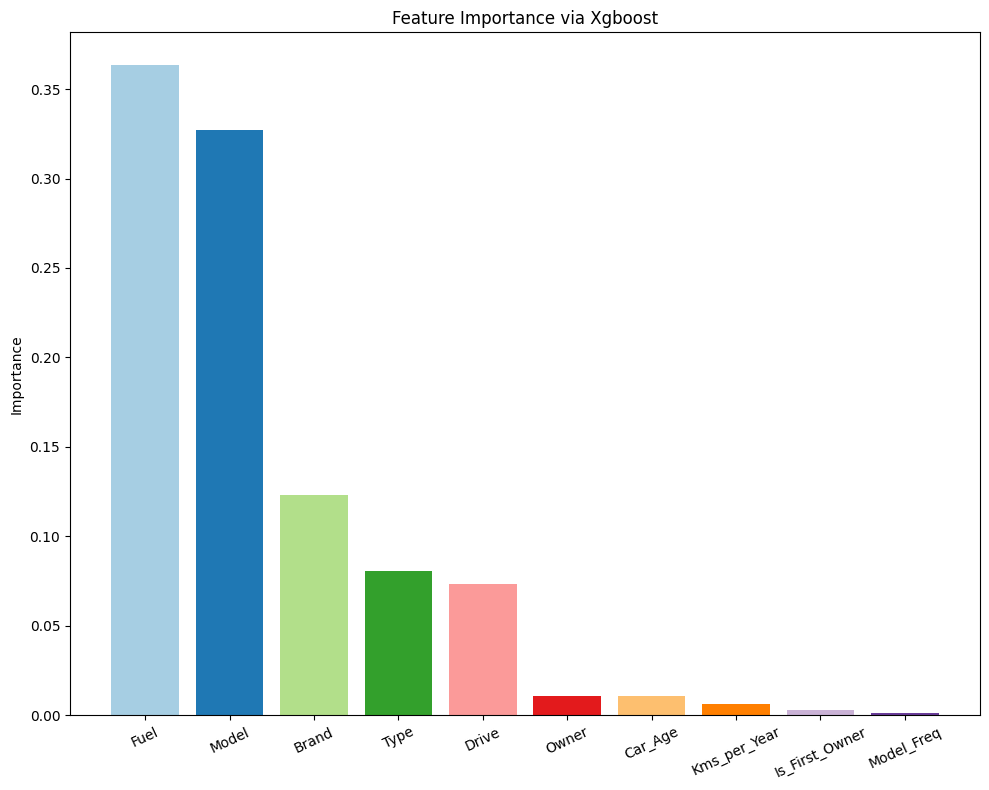

In [ ]:
# Get all feature names
num_cols = scale_only_cols + log_cols + ["Is_First_Owner"]
onehot_names = full_preprocessing_tr.named_transformers_["cat"].get_feature_names_out(cat_cols)

all_feature_names  = num_cols + list(onehot_names)

# Feature importances
importances = xgboost.named_steps["regressor"].feature_importances_

# Create DataFrame
importance_df = pd.DataFrame({"feature": all_feature_names, "importance": importances})

# Map one-hot encoded features back to original column
importance_df["original_feature"] = importance_df["feature"].apply(lambda x: x.split('_')[0] if x in onehot_names else x)

# Aggregate and sort
final_df = importance_df.groupby("original_feature")["importance"].sum().sort_values(ascending = False)

# Plot
fig,ax = plt.subplots(figsize = (10, 8))
ax.bar(final_df.index, final_df.values, color = sns.color_palette("Paired", len(final_df)))
ax.tick_params(axis = "x", rotation = 25)
ax.set_ylabel("Importance")
ax.set_title("Feature Importance via Xgboost")

plt.tight_layout()
plt.show()

##**Save the Model**

In [ ]:
import pickle

pickle.dump(xgboost, open("xgboost.pkl", "wb"))